In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# 1. Ingesting the data to jupyter notebook

In [2]:
data = pd.read_csv('game.csv') 
print("Dataset Shape: ", data.shape)

data.head(10)

/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset Shape:  (171907, 161)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
5,18710511,0,Thu,CH1,na,2,CL1,na,4,18,...,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,NaN,Y
6,18710513,0,Sat,WS3,na,2,CL1,na,5,12,...,Ezra Sutton,5.0,white104,Elmer White,9.0,bassj101,John Bass,6.0,NaN,Y
7,18710513,0,Sat,CH1,na,3,FW1,na,2,14,...,Ed Mincher,7.0,donnp101,Pete Donnelly,8.0,kellb105,Bill Kelly,9.0,NaN,Y
8,18710515,0,Mon,WS3,na,3,FW1,na,3,6,...,Ed Mincher,7.0,donnp101,Pete Donnelly,9.0,kellb105,Bill Kelly,8.0,NaN,Y
9,18710516,0,Tue,TRO,na,2,BS1,na,3,29,...,Fred Cone,7.0,spala101,Al Spalding,1.0,jacks101,Sam Jackson,8.0,HTBF,Y


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 211.2+ MB


# The dataset contains 161 columns and 171906 rows 

In [4]:
list(data)

['date',
 'number_of_game',
 'day_of_week',
 'v_name',
 'v_league',
 'v_game_number',
 'h_name',
 'h_league',
 'h_game_number',
 'v_score',
 'h_score',
 'length_outs',
 'day_night',
 'completion',
 'forefeit',
 'protest',
 'park_id',
 'attendance',
 'length_minutes',
 'v_line_score',
 'h_line_score',
 'v_at_bats',
 'v_hits',
 'v_doubles',
 'v_triples',
 'v_homeruns',
 'v_rbi',
 'v_sacrifice_hits',
 'v_sacrifice_flies',
 'v_hit_by_pitch',
 'v_walks',
 'v_intentional walks',
 'v_strikeouts',
 'v_stolen_bases',
 'v_caught_stealing',
 'v_grounded_into_double',
 'v_first_catcher_interference',
 'v_left_on_base',
 'v_pitchers_used',
 'v_individual_earned_runs',
 'v_team_earned_runs',
 'v_wild_pitches',
 'v_balks',
 'v_putouts',
 'v_assists',
 'v_errors',
 'v_passed_balls',
 'v_double_plays',
 'v_triple_plays',
 'h_at_bats',
 'h_hits',
 'h_doubles',
 'h_triples',
 'h_homeruns',
 'h_rbi',
 'h_sacrifice_hits',
 'h_sacrifice_flies',
 'h_hit_by_pitch',
 'h_walks',
 'h_intentional walks',
 'h_stri

# Above is the list of all the 161 columns

# After studying the columns, we eleminated columns 29 to the last column.

In [5]:
data.drop(data.iloc[:,29:200], inplace = True, axis = 1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               171907 non-null  int64  
 1   number_of_game     171907 non-null  int64  
 2   day_of_week        171907 non-null  object 
 3   v_name             171907 non-null  object 
 4   v_league           171907 non-null  object 
 5   v_game_number      171907 non-null  int64  
 6   h_name             171907 non-null  object 
 7   h_league           171907 non-null  object 
 8   h_game_number      171907 non-null  int64  
 9   v_score            171907 non-null  int64  
 10  h_score            171907 non-null  int64  
 11  length_outs        140841 non-null  float64
 12  day_night          140150 non-null  object 
 13  completion         116 non-null     object 
 14  forefeit           145 non-null     object 
 15  protest            180 non-null     object 
 16  pa

# The above is the list of the columns after applying Line 215 

# 2. Eliminating further the columns that are not useful in the dataset

In [7]:
res = data.drop(['date','number_of_game','day_of_week','v_name','v_league','v_game_number','h_name',
          'h_league','h_game_number','h_name','h_league','h_game_number',
          'length_outs','day_night','completion','forefeit','protest','park_id','attendance',
          'length_minutes','v_line_score','h_line_score'],axis=1)

In [8]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0


In [9]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   v_score            171907 non-null  int64  
 1   h_score            171907 non-null  int64  
 2   v_at_bats          140838 non-null  float64
 3   v_hits             140838 non-null  float64
 4   v_doubles          140838 non-null  float64
 5   v_triples          140838 non-null  float64
 6   v_homeruns         140838 non-null  float64
 7   v_rbi              140838 non-null  float64
 8   v_sacrifice_hits   140838 non-null  float64
 9   v_sacrifice_flies  140838 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 13.1 MB


# The information above are the columns that are important to answer our hypothesis.

In [10]:
res.head(10)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0


# 3. We created another column called Winner to represent the winning team (note: its not yet converted to binary)

In [11]:
res['Winner'] = res['h_score'] - res['v_score']

In [12]:
res

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,-2
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,-8
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,2
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,-4
...,...,...,...,...,...,...,...,...,...,...,...
171902,6,4,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,-2
171903,2,5,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,3
171904,1,7,30.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,6
171905,4,10,35.0,9.0,0.0,0.0,1.0,4.0,0.0,0.0,6


# 4. Our target is the Winner while our features are v_at_bats,	v_hits,	v_doubles,	v_triples,	v_homeruns,	v_rbi,	v_sacrifice_hits, and	v_sacrifice_flies. Now we graph each feature versus the target to find pattern in the data.	

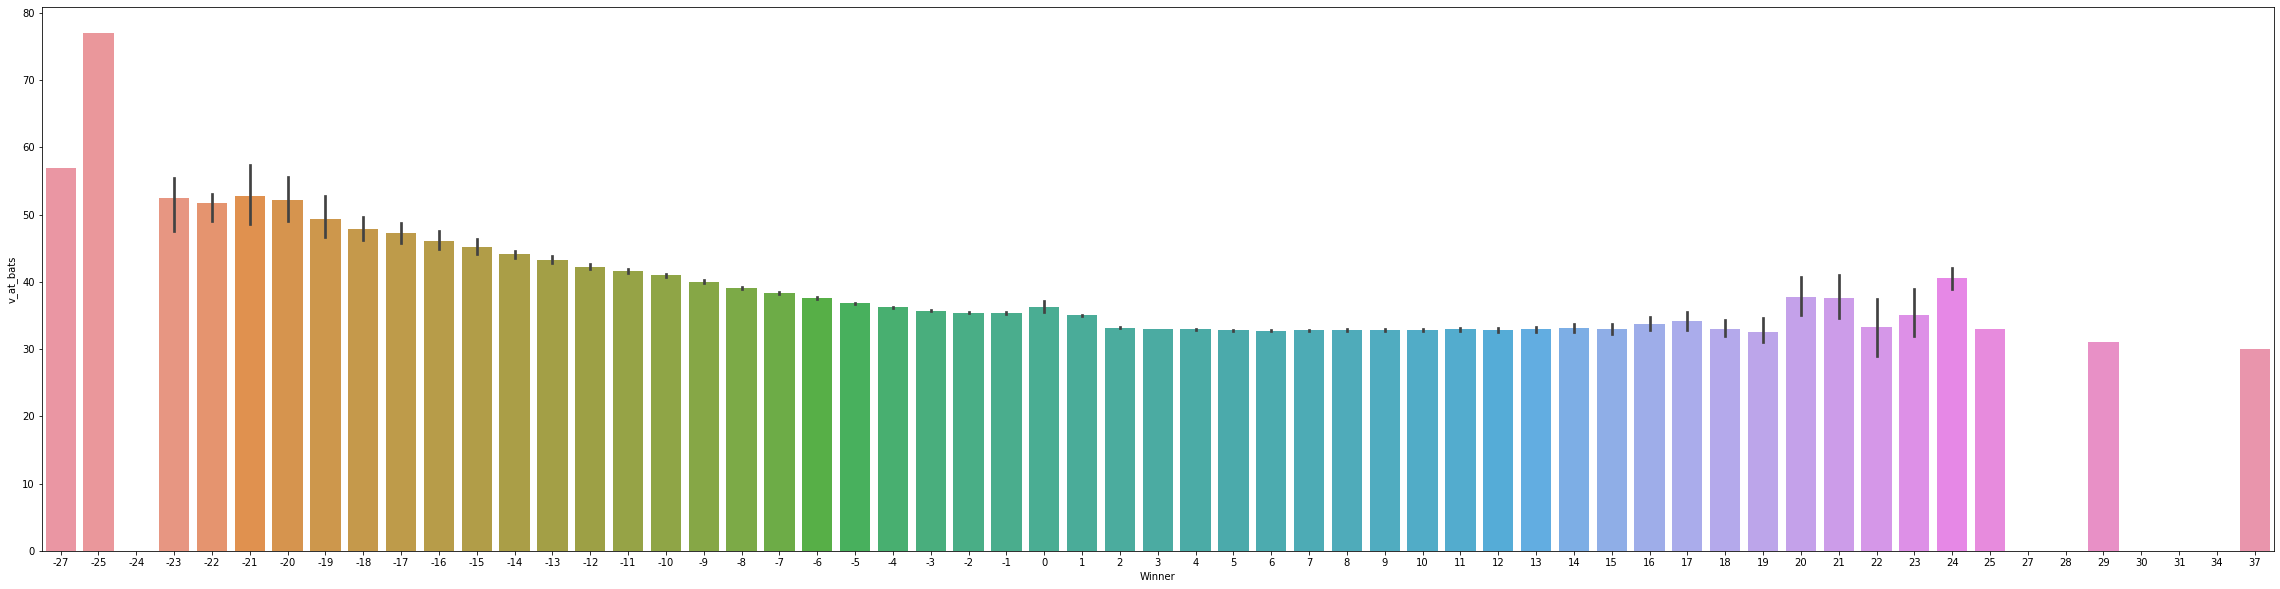

In [13]:
# v_at_bats vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_at_bats', data = res)

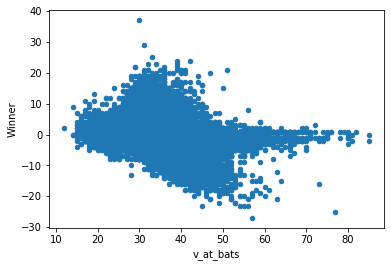

In [15]:
res.plot.scatter(x = 'v_at_bats', y = 'Winner')

# The barplot shows a downward trend while the scatter plot shows no trend.

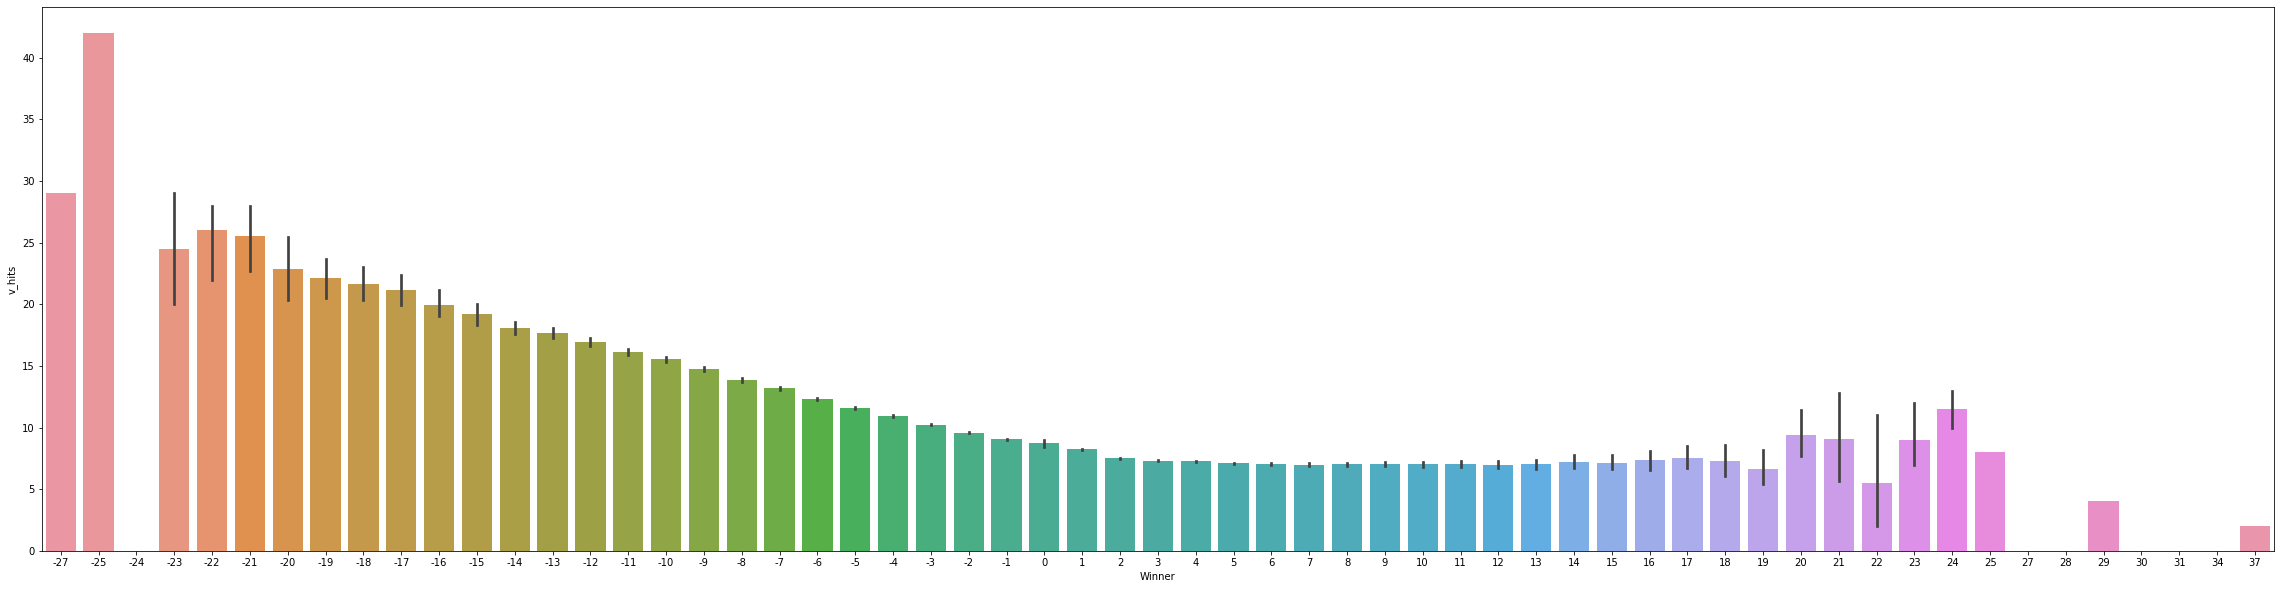

In [16]:
# v_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_hits', data = res)

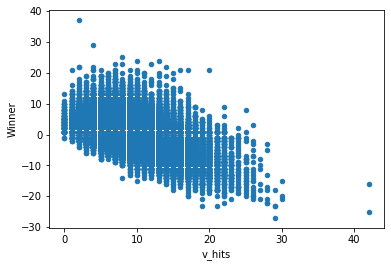

In [17]:
res.plot.scatter(x = 'v_hits', y = 'Winner')

# The barplot shows a downward trend. Also the scatter plot shows a downward trend.

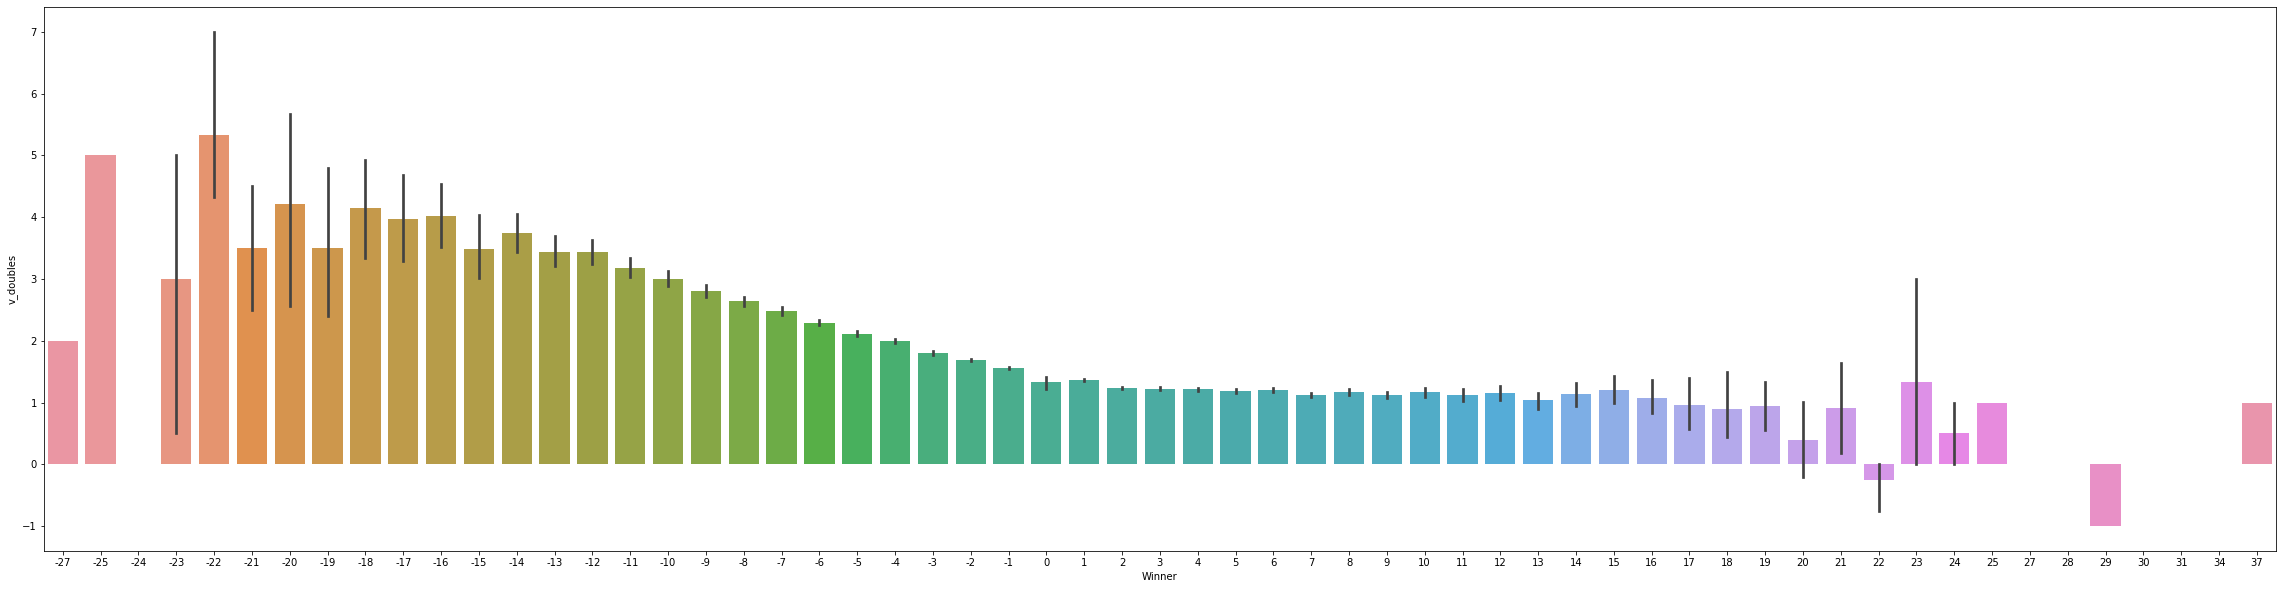

In [18]:
# v_doubles vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_doubles', data = res)

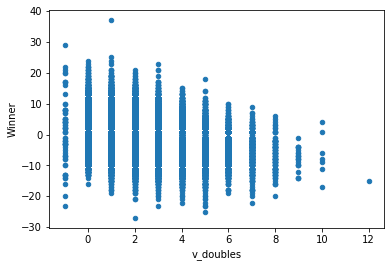

In [19]:
res.plot.scatter(x = 'v_doubles', y = 'Winner')

# The barplot shows a downward trend while the scatter plot shows a slight downward trend and an inverse behavior.

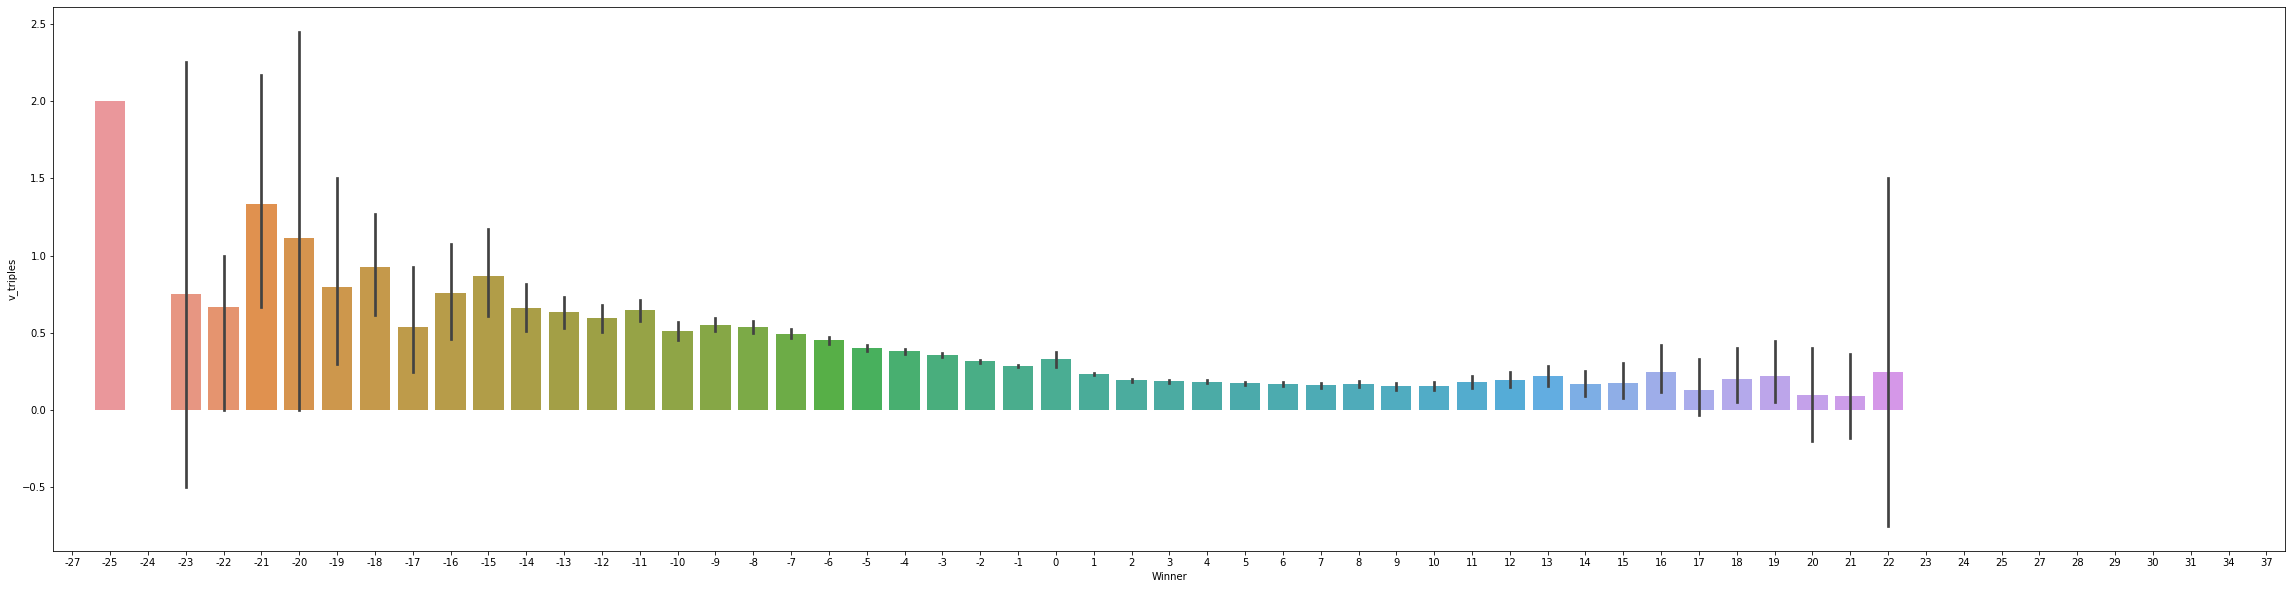

In [20]:
# v_triples vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_triples', data = res)

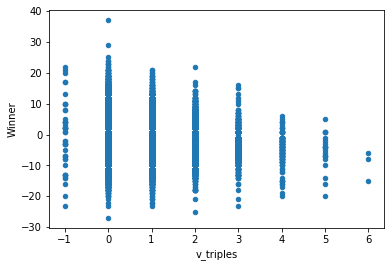

In [21]:
res.plot.scatter(x = 'v_triples', y = 'Winner')

# Both bar graph behaves downward trend while scatter plot shows downward trend and an inversely proportional behavior.

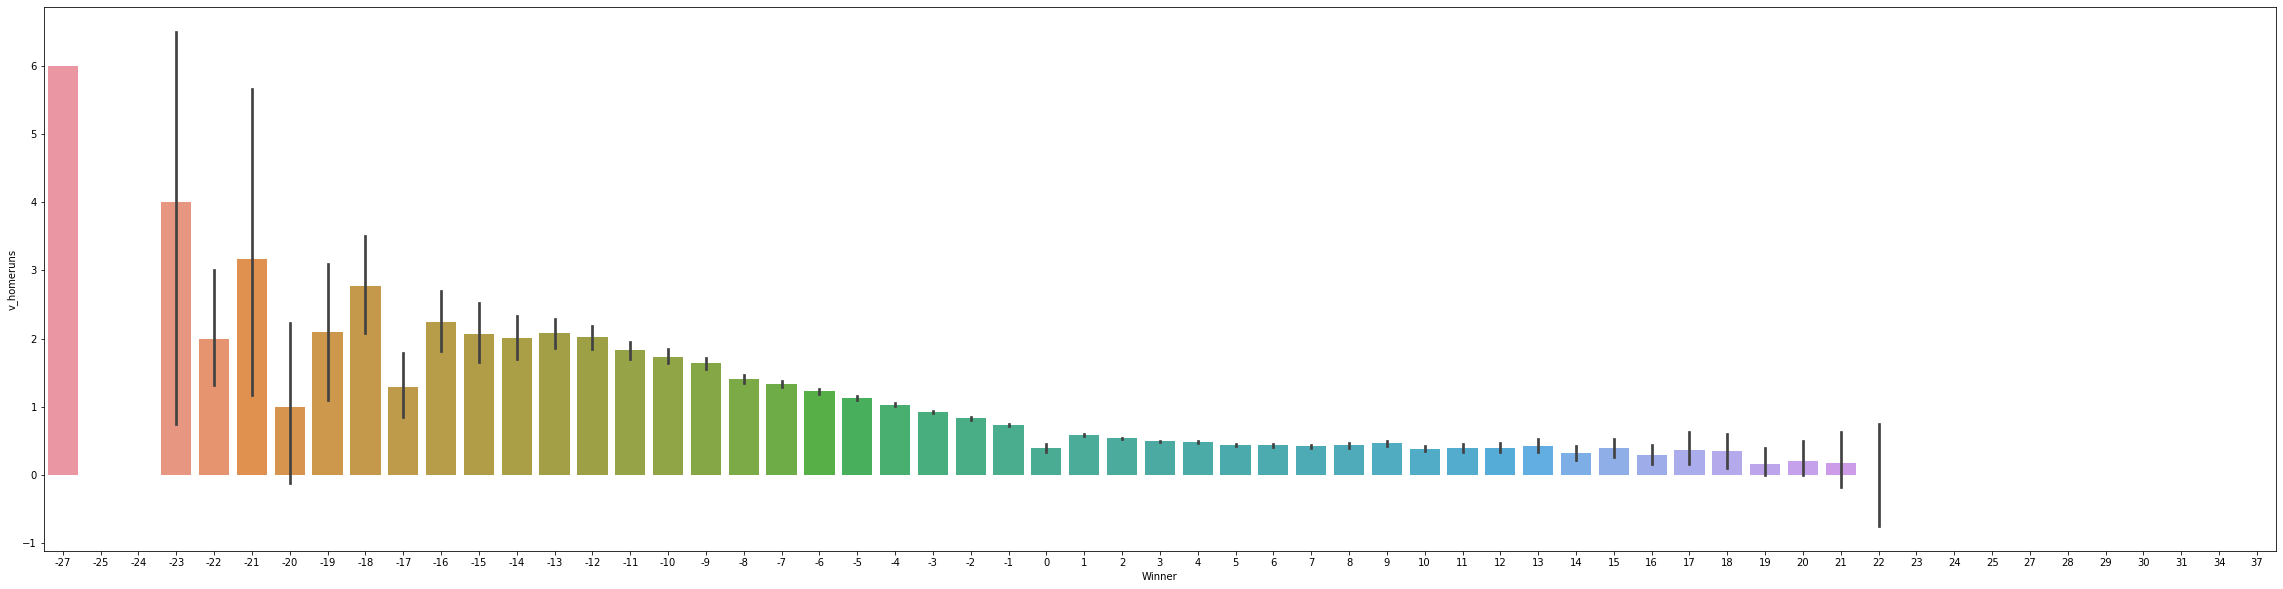

In [22]:
# v_homeruns vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_homeruns', data = res)

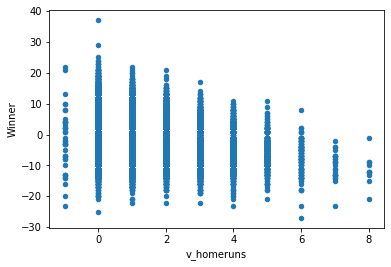

In [23]:
res.plot.scatter(x = 'v_homeruns', y = 'Winner')

# Both bar and scatter plots show downward trend. Also, the scatter graph display an inverse proportional relationship.

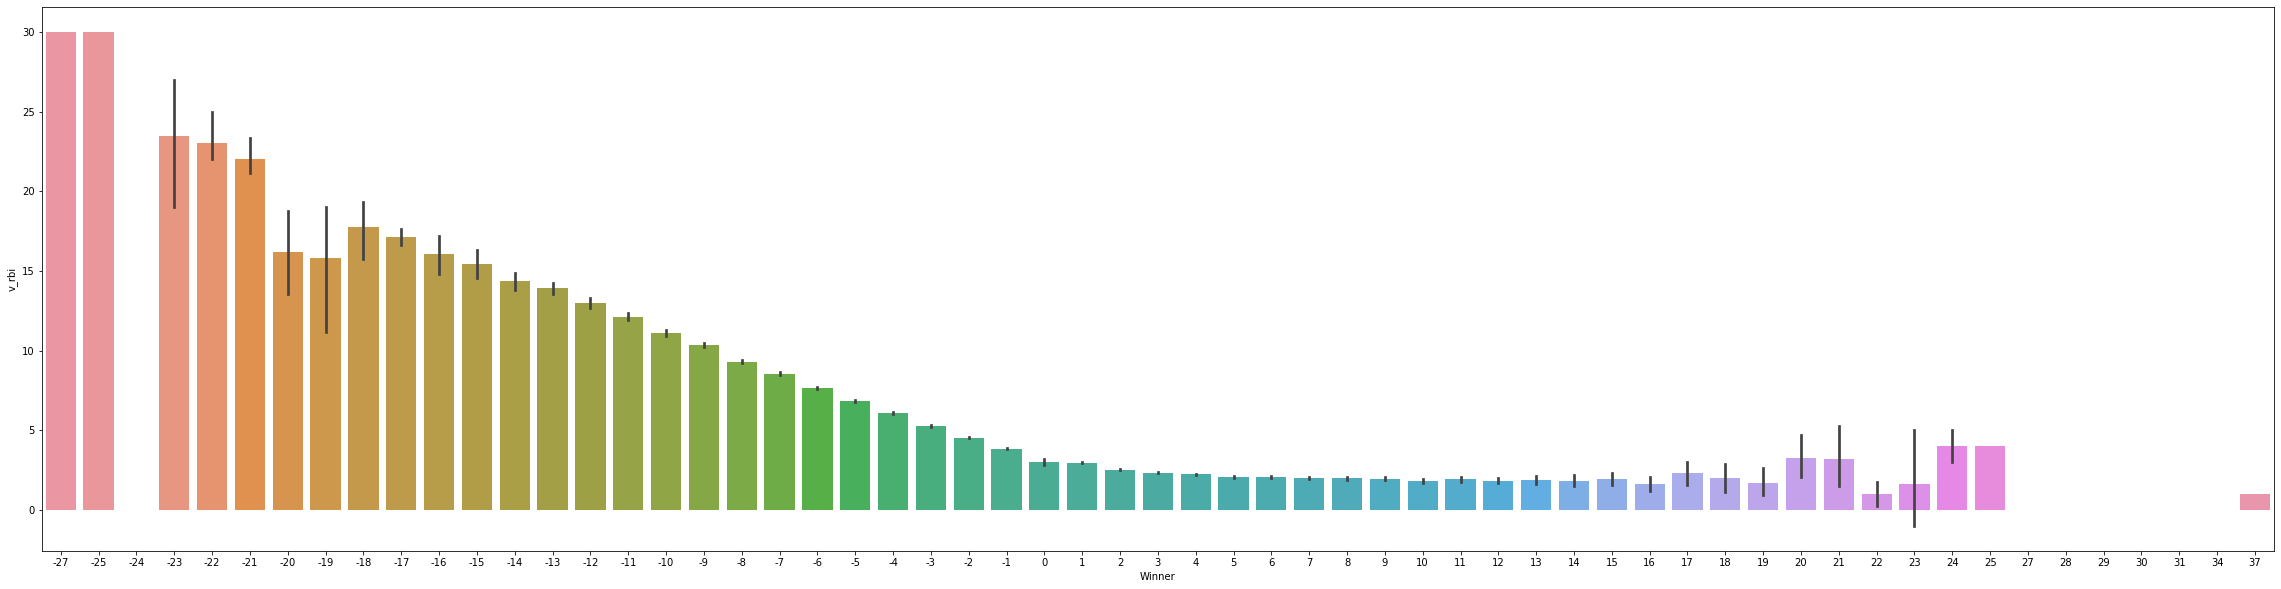

In [24]:
# v_rbi vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_rbi', data = res)

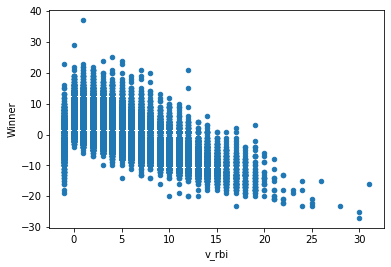

In [25]:
res.plot.scatter(x = 'v_rbi', y = 'Winner')

# The bar plot follows a downward trend while scatter graph displays  strong downward trend and an inversely proportional behavior.

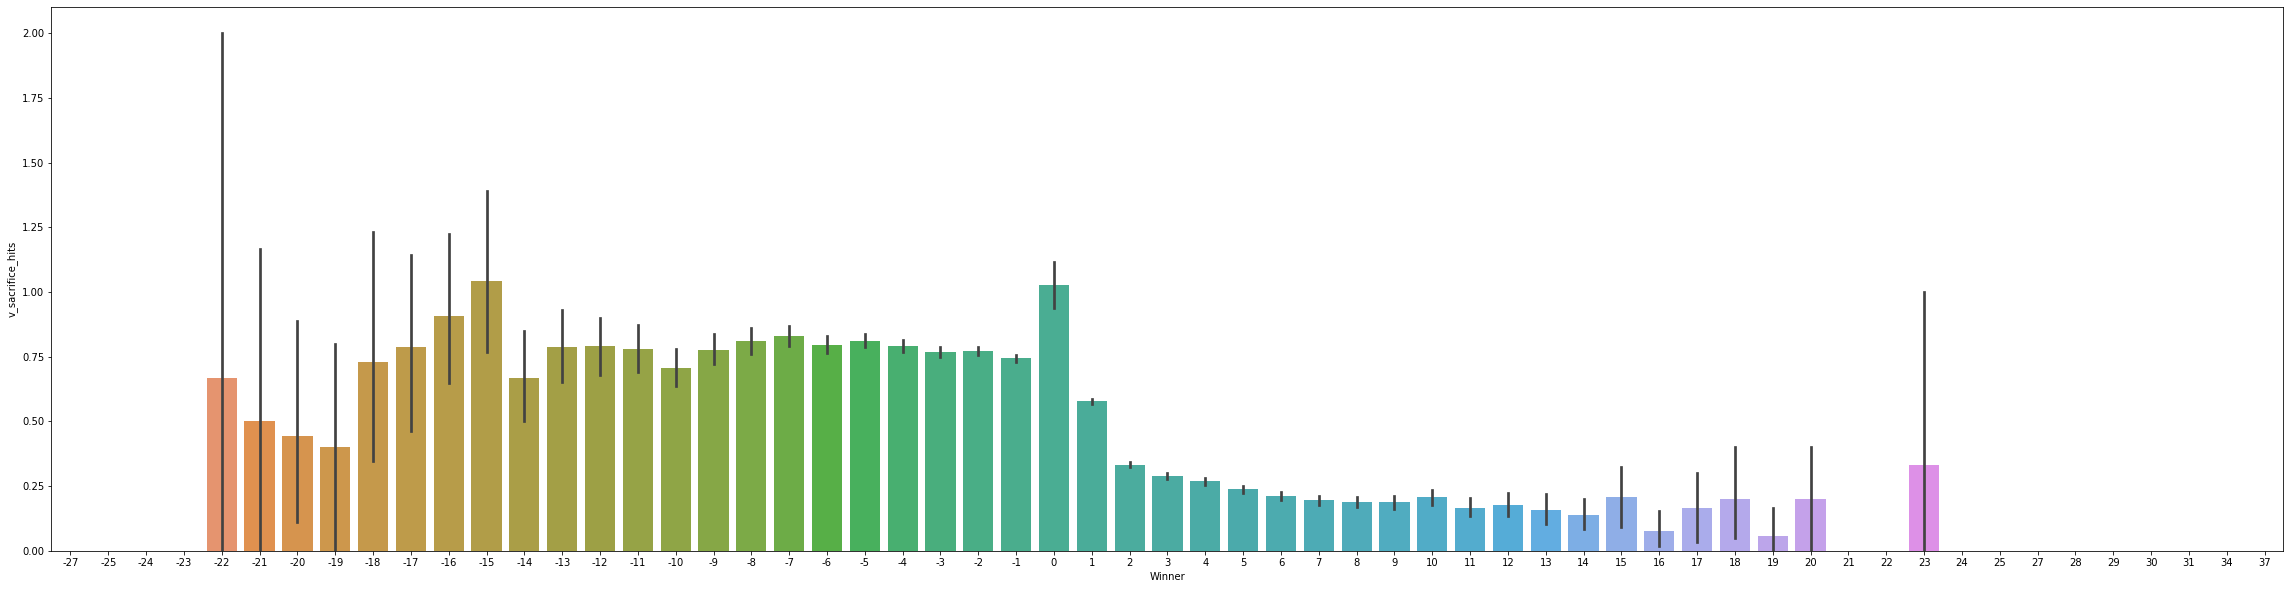

In [26]:
# v_sacrifice_hits vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_hits', data = res)

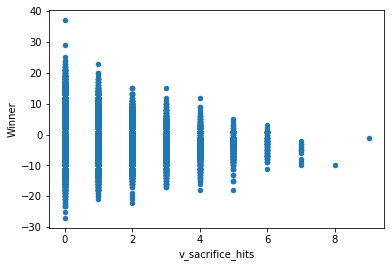

In [27]:
res.plot.scatter(x = 'v_sacrifice_hits', y = 'Winner')

# The barplot shows a slight downward trend. The scatter plot shows an inverse relationship.

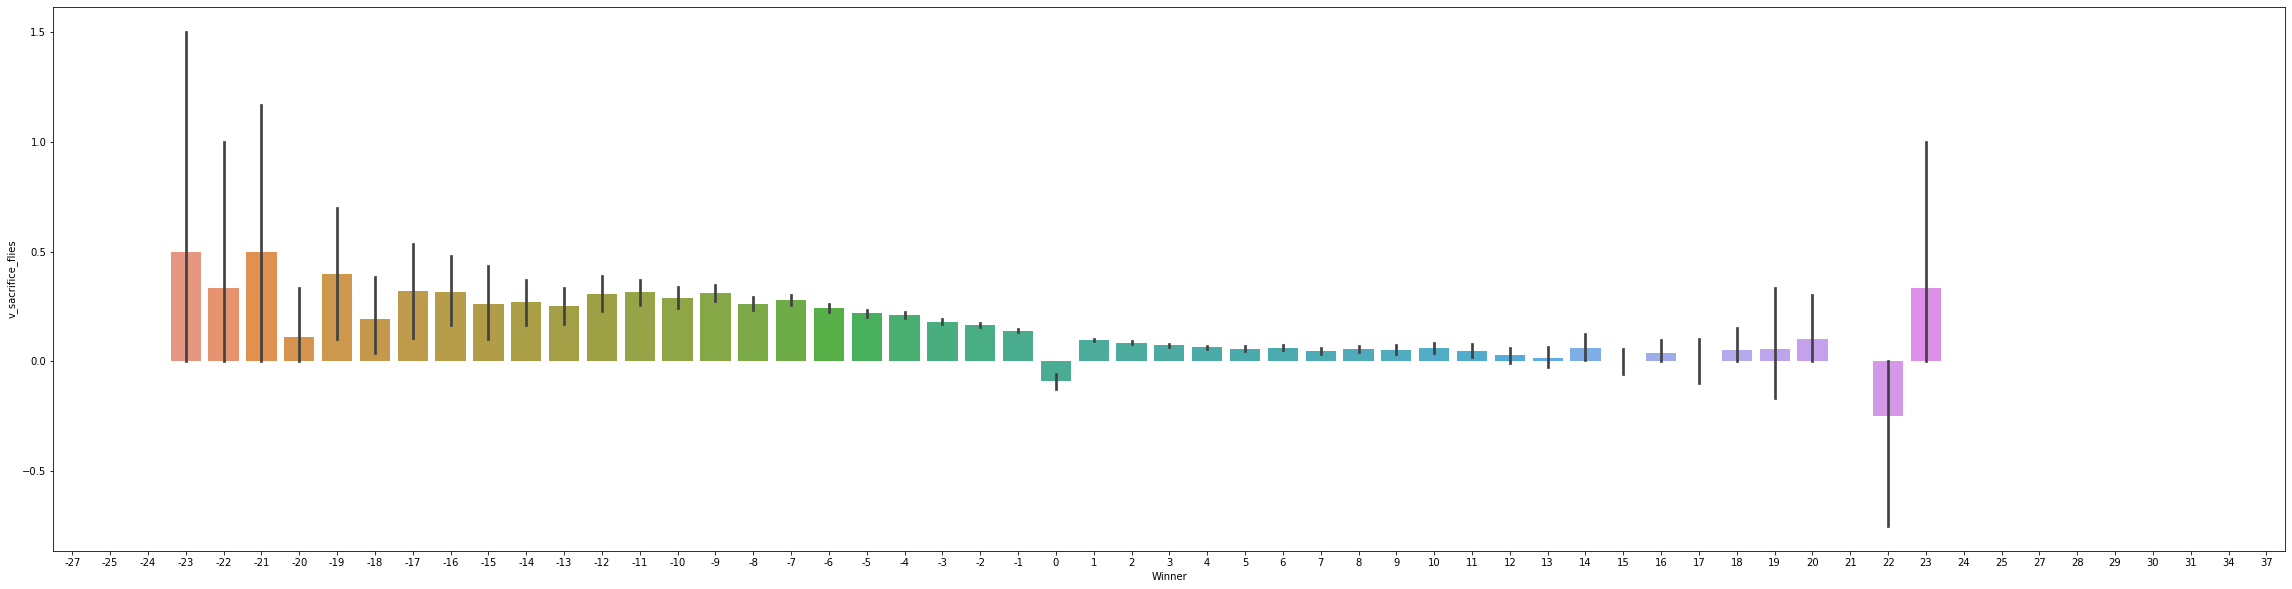

In [28]:
# v_sacrifice_flies vs Winner
plt.figure(figsize=(40,10))
sns.barplot(x = 'Winner', y = 'v_sacrifice_flies', data = res)

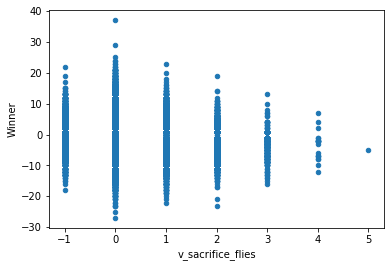

In [29]:
res.plot.scatter(x = 'v_sacrifice_flies', y = 'Winner')

# The barplot shows a downward trend while the scatter graph shows an inverse behavior.

# 5. Now we are going to convert the target to binary numbers: 1 represents a win and 0 represents a loss.

In [30]:
res['Winner'] = res['Winner'].apply(lambda x: 1 if x > 0 else 0)
res.head(20)

,v_score,h_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,0,2,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,20,18,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,12,4,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,12,14,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,9,5,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0
5,18,10,41.0,15.0,1.0,3.0,3.0,10.0,0.0,0.0,0
6,12,8,42.0,9.0,2.0,0.0,0.0,5.0,0.0,0.0,0
7,14,5,45.0,17.0,5.0,2.0,0.0,10.0,0.0,0.0,0
8,6,12,42.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,1
9,29,14,64.0,26.0,3.0,1.0,0.0,26.0,0.0,0.0,0


1    93587
0    78320
Name: Winner, dtype: int64


/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


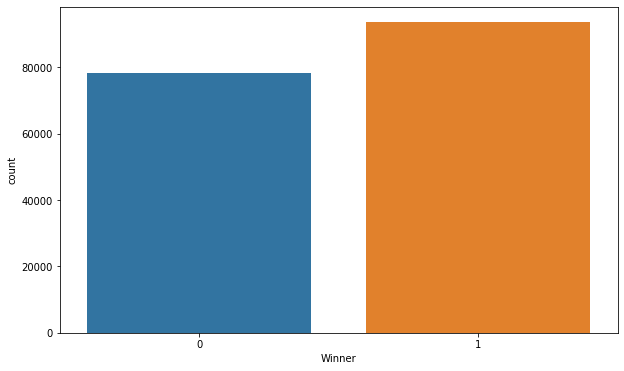

In [31]:
print(res['Winner'].value_counts())

fig = plt.figure(figsize=(10,6))
sns.countplot(res['Winner'])

# Removing the first two columns, we do not really need them. Here we obtained our final data with the features as our independent variables and the target (Winner) as the dependent variable.

In [32]:
Data_Final = res.drop(['v_score','h_score'],axis=1)

In [33]:
Data_Final.head()

,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,Winner
0,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0
2,49.0,11.0,1.0,1.0,0.0,8.0,0.0,0.0,0
3,46.0,15.0,2.0,1.0,2.0,10.0,0.0,0.0,1
4,46.0,17.0,4.0,1.0,0.0,6.0,0.0,0.0,0


In [34]:
Data_Final.mean()

v_at_bats            34.914398
v_hits                8.999318
v_doubles             1.562391
v_triples             0.276012
v_homeruns            0.728653
v_rbi                 3.993042
v_sacrifice_hits      0.558741
v_sacrifice_flies     0.128609
Winner                0.544405
dtype: float64

# Replacing data that are empty, Null, na, or none to NAN 

In [35]:
df = Data_Final.replace([' ','NULL','na','(none)'],np.nan)

In [36]:
print(df.isin(['NaN']))

        v_at_bats  v_hits  v_doubles  v_triples  v_homeruns  v_rbi  \
0           False   False      False      False       False  False   
1           False   False      False      False       False  False   
2           False   False      False      False       False  False   
3           False   False      False      False       False  False   
4           False   False      False      False       False  False   
...           ...     ...        ...        ...         ...    ...   
171902      False   False      False      False       False  False   
171903      False   False      False      False       False  False   
171904      False   False      False      False       False  False   
171905      False   False      False      False       False  False   
171906      False   False      False      False       False  False   

        v_sacrifice_hits  v_sacrifice_flies  Winner  
0                  False              False   False  
1                  False              False   False

In [37]:
print(df.isin(['NaN']).mean())

v_at_bats            0.0
v_hits               0.0
v_doubles            0.0
v_triples            0.0
v_homeruns           0.0
v_rbi                0.0
v_sacrifice_hits     0.0
v_sacrifice_flies    0.0
Winner               0.0
dtype: float64


In [38]:
# drop any NaNs
df_2 = df.dropna()

In [39]:
df_2.shape

(140838, 9)

In [40]:
df_2.dtypes

v_at_bats            float64
v_hits               float64
v_doubles            float64
v_triples            float64
v_homeruns           float64
v_rbi                float64
v_sacrifice_hits     float64
v_sacrifice_flies    float64
Winner                 int64
dtype: object

# 6. Apply different Machine Learning Model

In [41]:
#ML model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [42]:
#VS
from yellowbrick.classifier import classification_report, confusion_matrix, discrimination_threshold

In [43]:
features = df_2[[ 'v_at_bats', 'v_hits', 'v_doubles','v_triples','v_homeruns',
                 'v_rbi','v_sacrifice_hits','v_sacrifice_flies']]

target = df_2[['Winner']].values.ravel()

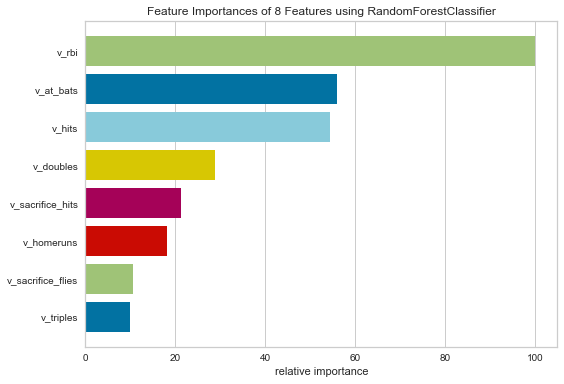

In [44]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

# Load the classification data set

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(features, target)
viz.show()

In [45]:
#figer out the best seven features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
    
fvalue_Best = SelectKBest(f_classif, k=8)
X_kbest = fvalue_Best.fit_transform(features, target)

In [46]:
print('Original number of features:', df_2.shape)
print('Reduced number of features:', X_kbest.shape)

Original number of features: (140838, 9)
Reduced number of features: (140838, 8)


In [47]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_kbest, target, test_size=0.2
)


In [48]:
X_train.shape

(112670, 8)

In [49]:
y_train.shape

(112670,)

In [50]:
# Taking the best seven features and applying them to different ML models
cross_validate(GaussianNB(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.00972581, 0.01194406, 0.01695704, 0.02586794, 0.0390358 ]),
 'score_time': array([0.01033521, 0.0083797 , 0.00764203, 0.01119113, 0.01143813]),
 'test_score': array([0.71721524, 0.71815706, 0.72482644, 0.71944466, 0.72194337])}

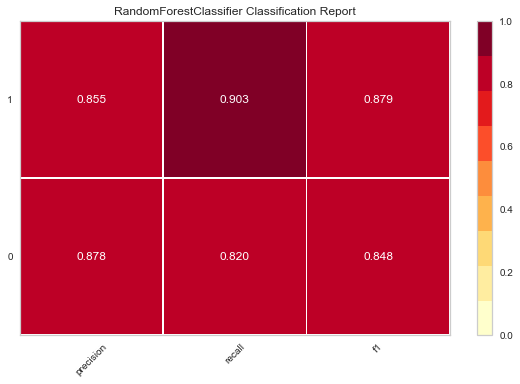

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e6c6f50>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a2e6c6450>,
                     encoder=None,
                     estimator=RandomForestClassifier(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                     

In [51]:
classification_report(model, X_train, y_train, is_fitted=False)

In [52]:
cross_validate(SVC(kernel='rbf', degree=3), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([  6.70711875,  26.97334981,  59.71868229, 145.67550063,
        213.77280688]),
 'score_time': array([ 3.22728109,  7.99498796,  9.78589892, 14.29096031, 16.92573118]),
 'test_score': array([0.74983505, 0.74953509, 0.75702487, 0.75112066, 0.75468018])}

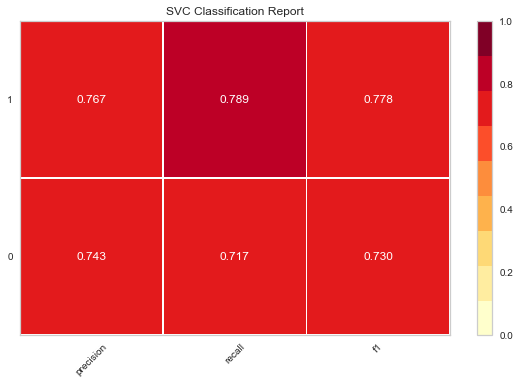

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e6bb5d0>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a2a0fd910>,
                     encoder=None,
                     estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                   class_weight=None, coef0=0.0,
                                   decision_function_shape='ovr', degree=3,
                                   gamma='scale', kernel='rbf', max_iter=-1,
                                   probability=False, random_state=None,
                                   shrinking=True, tol=0.001, verbose=False),
                     force_model=False, is_fitted=False, support=None)

In [53]:
classification_report(SVC(kernel='rbf', degree=3), X_train, y_train,is_fitted=False)

In [54]:
cross_validate(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=TimeSeriesSplit(),
               scoring='f1_macro')

{'fit_time': array([0.02598   , 0.06428194, 0.1354301 , 0.23782015, 0.35711789]),
 'score_time': array([1.0354991 , 1.01550412, 1.30760407, 1.51538205, 1.76328421]),
 'test_score': array([0.71842432, 0.71649563, 0.72260978, 0.717672  , 0.71773402])}

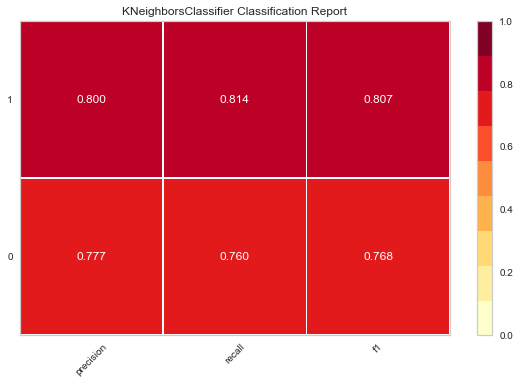

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d5da4d0>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a2d5d1890>,
                     encoder=None,
                     estimator=KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=5,
                                                    p=2, weights='uniform'),
                     force_model=False, is_fitted='auto', support=None)

In [55]:
classification_report(KNeighborsClassifier(n_neighbors=5), X_train, y_train)

In [56]:
cross_validate(LogisticRegression(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/robertofabian/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

{'fit_time': array([0.13764024, 0.16716599, 0.30524111, 0.41711712, 0.67036533]),
 'score_time': array([0.00776482, 0.00531912, 0.00604296, 0.00806499, 0.00532985]),
 'test_score': array([0.74581646, 0.74635117, 0.75339571, 0.74927575, 0.75010378])}

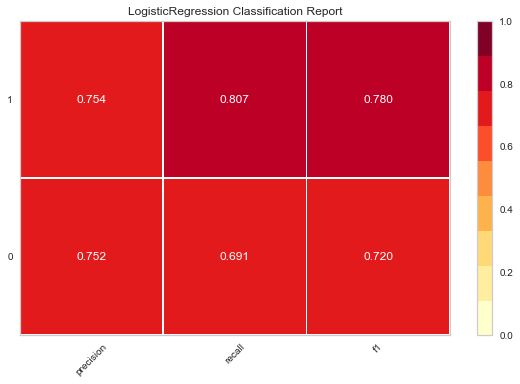

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1084d08d0>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a2e0b9ad0>,
                     encoder=None,
                     estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     force

In [57]:
classification_report(LogisticRegression(), X_train, y_train)

In [58]:
cross_validate(GaussianNB(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.00804019, 0.01040196, 0.01655197, 0.02158594, 0.02980185]),
 'score_time': array([0.00952291, 0.00873184, 0.00770783, 0.0075841 , 0.0107131 ]),
 'test_score': array([0.71721524, 0.71815706, 0.72482644, 0.71944466, 0.72194337])}

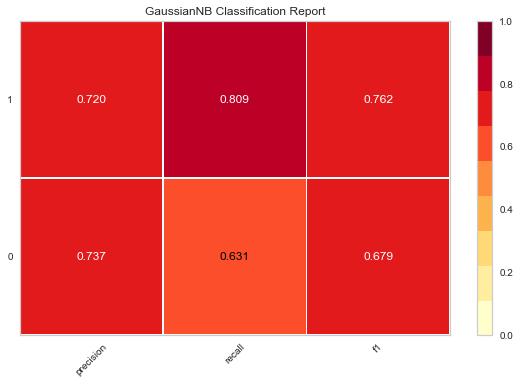

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e716690>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x1a2e716550>,
                     encoder=None,
                     estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                     force_model=False, is_fitted=False, support=None)

In [59]:
classification_report(GaussianNB(), X_train, y_train, is_fitted=False)

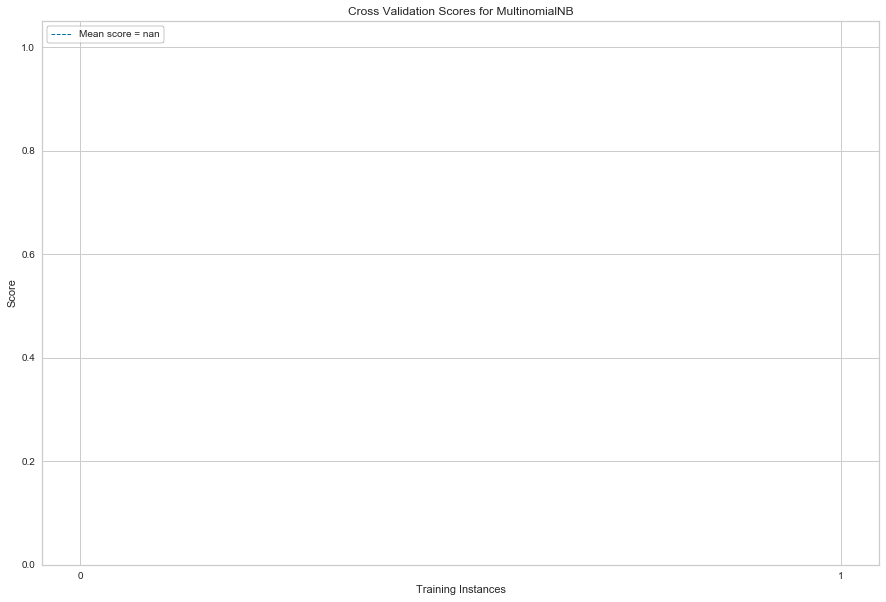

In [313]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores


# Load the classification data set


# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = MultinomialNB()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X_kbest, target)
visualizer.show()

# 7. Predicting Error 

In [311]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError




# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Draw the data

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 1080x720 with 0 Axes>

# 6. Separating the dependent (target) and independent (features) variables

In [101]:
X = Data_Final.iloc[:, :-1].values
y = Data_Final.iloc[:,-1].values

In [102]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [103]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [104]:
# Separating into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("X- train Shape: ", X_train.shape)
print("X- test Shape: ", X_test.shape)
print("y- train Shape: ", y_train.shape)
print("y- test Shape: ", y_test.shape)

X- train Shape:  (137525, 8)
X- test Shape:  (34382, 8)
y- train Shape:  (137525,)
y- test Shape:  (34382,)


# 7. Implement standard scaling to scale the values in the dataset in the same scale

In [115]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 8.  Apply different machine learnin algorithms

In [116]:
# Random Forest Classifier

rf_regressor = RandomForestClassifier(n_estimators=100)

# Fitting the training data on the classifier
rf_regressor.fit(X_train,y_train)

# Predicting the test data using the classifier
y_pred = rf_regressor.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

[[ 9258  6572]
 [ 3111 15441]]


<Figure size 720x432 with 0 Axes>

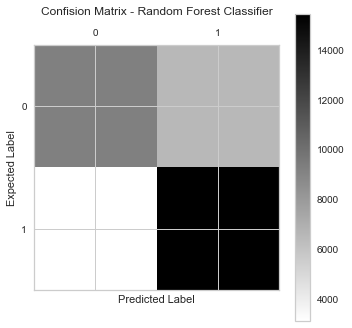

In [117]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [118]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  24699
Incorrect Prediction :  9683
Accuracy :  71.83700773660637 %


In [112]:
# Support Vector Classifier (SVC)
svc_regressor = SVC()

svc_regressor.fit(X_train,y_train)

y_pred = svc_regressor.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

[[ 9258  6572]
 [ 3111 15441]]


<Figure size 720x432 with 0 Axes>

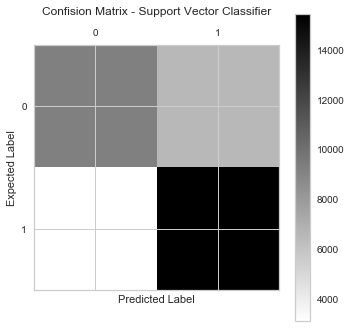

In [113]:
# Apply confusion matrix to the random forest classifier
cm = confusion_matrix(y_test,y_pred)

print(cm)

# Plot of the confusion matrix
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confision Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()

In [114]:
print("Total Predictions : ", len(y_pred))
print("Correct Prediction : ", sum(y_pred==y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred==y_test)*100 / len(y_pred),"%")

Total Predictions :  34382
Correct Prediction :  24699
Incorrect Prediction :  9683
Accuracy :  71.83700773660637 %


# Remarks: This is not yet done. I will continue working on this. Please let me know if you have any suggestions.  

In [69]:
X

array([[30.,  4.,  1., ...,  0.,  0.,  0.],
       [41., 13.,  1., ..., 13.,  0.,  0.],
       [49., 11.,  1., ...,  8.,  0.,  0.],
       ...,
       [30.,  4.,  0., ...,  1.,  0.,  0.],
       [35.,  9.,  0., ...,  4.,  0.,  0.],
       [38., 14.,  1., ...,  7.,  1.,  0.]])

In [70]:
y

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
import os
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

from yellowbrick.classifier import ClassificationReport

In [ ]:
def score_model(X_kbest, target, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder()), 
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X_kbest, target, **kwargs)  
    
    expected  = target
    predicted = model.predict(X_kbest)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [ ]:
# Try them all!

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    score_model(X_kbest, target, model)